# Lab 02: Simple Linear Regression 를 TensorFlow 로 구현하기

## 핵심키워드
- 선형회귀(Linear Regression)
- 가설(Hypothesis)
- 비용함수(Cost function)

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(f'>>> original : tf - 2.4.0  |  np - 1.19.4')
print(f'>>> present  : tf - {tf.__version__}  |  np - {np.__version__}')

>>> original : tf - 2.4.0  |  np - 1.19.4
>>> present  : tf - 2.4.0  |  np - 1.19.4


## Hypothesis and Cost

tf.Tensor([ 3.4       6.3       9.200001 12.1      15.      ], shape=(5,), dtype=float32)


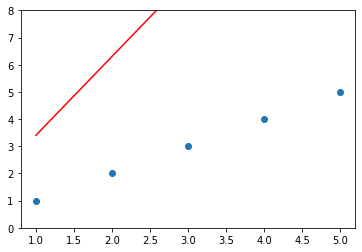

In [ ]:
# Data
x_data = list(range(1, 6))
y_data = list(range(1, 6))

# W, b initialize
W = tf.Variable(2.9)
b = tf.Variable(0.5)

# hypothesis
hypothesis = W * x_data + b
print(hypothesis)

plt.plot(x_data, y_data, 'o')
plt.plot(x_data, hypothesis, 'r-')
plt.ylim(0, 8)
plt.show()

In [ ]:
# cost
cost = tf.reduce_mean(tf.square(hypothesis - y_data))
print(cost.numpy())

# gradient
with tf.GradientTape() as tape:
  hypothesis = W * x_data + b
  cost = tf.reduce_mean(tf.square(hypothesis - y_data))

W_grad, b_grad = tape.gradient(cost, [W, b])
print(W_grad.numpy(), b_grad.numpy())

45.660004
44.800003 12.400002


## 파라미터 업데이트

1.1080003 0.0039999485


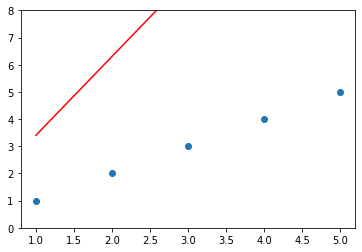

In [ ]:
learning_rate = 0.01

W.assign_sub(learning_rate * W_grad)
b.assign_sub(learning_rate * b_grad)
print(W.numpy(), b.numpy())

plt.plot(x_data, y_data, 'o')
plt.plot(x_data, hypothesis, 'r-')
plt.ylim(0, 8)
plt.show()

## 여러 번 반복

    0|    2.4520|    0.3760| 45.660004
   10|    1.1036|    0.0034|  0.206336
   20|    1.0128|   -0.0209|  0.001026
   30|    1.0065|   -0.0218|  0.000093
   40|    1.0059|   -0.0212|  0.000083
   50|    1.0057|   -0.0205|  0.000077
   60|    1.0055|   -0.0198|  0.000072
   70|    1.0053|   -0.0192|  0.000067
   80|    1.0051|   -0.0185|  0.000063
   90|    1.0050|   -0.0179|  0.000059
  100|    1.0048|   -0.0173|  0.000055


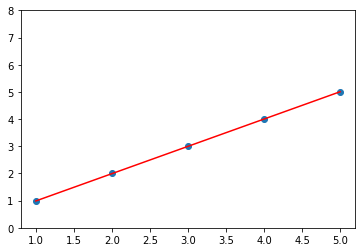

In [ ]:
W = tf.Variable(2.9)
b = tf.Variable(0.5)

for i in range(100+1):
  with tf.GradientTape() as tape:
    hypothesis = W * x_data + b
    cost = tf.reduce_mean(tf.square(hypothesis - y_data))
  W_grad, b_grad = tape.gradient(cost, [W, b])
  W.assign_sub(learning_rate * W_grad)
  b.assign_sub(learning_rate * b_grad)

  if i%10==0:
    print(f'{i:5}|{W.numpy():10.4f}|{b.numpy():10.4f}|{cost:10.6f}')

plt.plot(x_data, y_data, 'o')
plt.plot(x_data, hypothesis, 'r-')
plt.ylim(0, 8)
plt.show()

## predict

In [ ]:
print(W * 5 + b)
print(W * 2.5 + b)

tf.Tensor(5.00667, shape=(), dtype=float32)
tf.Tensor(2.4946702, shape=(), dtype=float32)
